# Problem statement
## Context
With the introduction of 3D animation, 2D animation started to be considered as obsolete in the western market. However, japanese animation (anime) is still prevalent with 2D hand-drawn animation, which is still evolving with introduciton of new genres and recent animation studios appearing there in Japan. To legally broadcast anime outside of Japan the licensors have to buy rights for the specific anime. Since their business is strongly dependant on the popularity of the anime they bought rights on, it is useful to predict the popularity or score of it.

## Goal
Identify factors that might help predict popularity of the anime (without considering synopsis).

# Data Collection
## Data Source
I used "Anime data" dataset from Kaggle provided by user [Canggih P Wibowo](https://www.kaggle.com/canggih/anime-data-score-staff-synopsis-and-genre).

## Data Description


In [199]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}
/*Disabling autoscrolling for long graphs*/

<IPython.core.display.Javascript object>

In [200]:
import numpy as np
import pandas as pd 

import re
import matplotlib.pyplot as plt
from pdpbox import pdp, get_dataset, info_plots
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [201]:
data = pd.read_csv('dataanime.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1563 entries, 0 to 1562
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Title            1563 non-null   object 
 1   Type             1563 non-null   object 
 2   Episodes         1563 non-null   object 
 3   Status           1563 non-null   object 
 4   Start airing     1563 non-null   object 
 5   End airing       1563 non-null   object 
 6   Starting season  1563 non-null   object 
 7   Broadcast time   1563 non-null   object 
 8   Producers        1563 non-null   object 
 9   Licensors        1563 non-null   object 
 10  Studios          1563 non-null   object 
 11  Sources          1563 non-null   object 
 12  Genres           1563 non-null   object 
 13  Duration         1563 non-null   object 
 14  Rating           1563 non-null   object 
 15  Score            1563 non-null   float64
 16  Scored by        1563 non-null   int64  
 17  Members       

In [202]:
data.head()

,Title,Type,Episodes,Status,Start airing,End airing,Starting season,Broadcast time,Producers,Licensors,Studios,Sources,Genres,Duration,Rating,Score,Scored by,Members,Favorites,Description
0,Fullmetal Alchemist: Brotherhood,TV,64,Finished Airing,2009-4-5,2010-7-4,Spring,Sundays at 17:00 (JST),"Aniplex,Square Enix,Mainichi Broadcasting Syst...","Funimation,Aniplex of America",Bones,Manga,"Action,Military,Adventure,Comedy,Drama,Magic,F...",24 min. per ep.,R,9.25,719706,1176368,105387,"""In order for something to be obtained, someth..."
1,Kimi no Na wa.,Movie,1,Finished Airing,2016-8-26,-,-,-,"Kadokawa Shoten,Toho,Sound Team Don Juan,Lawso...","Funimation,NYAV Post",CoMix Wave Films,Original,"Supernatural,Drama,Romance,School",1 hr. 46 min.,PG-13,9.19,454969,705186,33936,"Mitsuha Miyamizu, a high school girl, yearns t..."
2,Gintama°,TV,51,Finished Airing,2015-4-8,2016-3-30,Spring,Wednesdays at 18:00 (JST),"TV Tokyo,Aniplex,Dentsu","Funimation,Crunchyroll",Bandai Namco Pictures,Manga,"Action,Comedy,Historical,Parody,Samurai,Sci-Fi...",24 min. per ep.,R,9.16,70279,194359,5597,"Gintoki, Shinpachi, and Kagura return as the f..."
3,Steins;Gate 0,TV,23,Currently Airing,2018-4-12,-,Spring,Thursdays at 01:35 (JST),Nitroplus,Funimation,White Fox,Visual novel,"Sci-Fi,Thriller",23 min. per ep.,PG-13,9.16,12609,186331,1117,The dark untold story of Steins;Gate that lead...
4,Steins;Gate,TV,24,Finished Airing,2011-4-6,2011-9-14,Spring,Wednesdays at 02:05 (JST),"Frontier Works,Media Factory,Movic,AT-X,Kadoka...",Funimation,White Fox,Visual novel,"Sci-Fi,Thriller",24 min. per ep.,PG-13,9.14,552791,990419,90365,The self-proclaimed mad scientist Rintarou Oka...


**We can see that 'Episodes' are object values, however, it looks like they have to be int64. Let's check this column.**

In [203]:
data.Episodes.unique()

array(['64', '1', '51', '23', '24', '110', '148', '22', '13', '7', '12',
       '201', '10', '25', '26', '75', '4', '11', '43', '27', '37', '39',
       '47', '99', '120', '101', '-', '2', '50', '112', '62', '33', '94',
       '3', '8', '14', '40', '15', '77', '291', '203', '79', '6', '70',
       '38', '500', '103', '153', '102', '45', '21', '63', '175', '52',
       '5', '28', '145', '36', '78', '60', '69', '178', '35', '34', '109',
       '113', '114', '9', '49', '61', '97', '366', '167', '54', '358',
       '104', '20', '220', '48', '42', '46', '100', '142', '373', '131',
       '195', '1787', '19', '17', '147', '73', '127', '74', '16', '150',
       '140', '76', '53', '98', '29', '115', '18', '124', '224', '44',
       '154', '58'], dtype=object)

**Now, we know it's because there were some empty entries where value is '-'. Let's look at them**

In [204]:
data.loc[(data.Episodes == '-')]

,Title,Type,Episodes,Status,Start airing,End airing,Starting season,Broadcast time,Producers,Licensors,Studios,Sources,Genres,Duration,Rating,Score,Scored by,Members,Favorites,Description
84,One Piece,TV,-,Currently Airing,1999-10-20,-,Fall,Sundays at 09:30 (JST),"Fuji TV,TAP,Shueisha","Funimation,4Kids Entertainment",Toei Animation,Manga,"Action,Adventure,Comedy,Super Power,Drama,Fant...",24 min.,PG-13,8.54,417652,707815,68985,"Gol D. Roger was known as the ""Pirate King,"" t..."
248,Detective Conan,TV,-,Currently Airing,1996-1-8,-,Winter,Saturdays at 18:00 (JST),"Yomiuri Telecasting,Animax,YTV,TMS-Kyokuchi,Sh...","Funimation,Crunchyroll",TMS Entertainment,Manga,"Adventure,Mystery,Comedy,Police,Shounen",25 min.,PG-13,8.26,76893,154190,7626,"Shinichi Kudou, a great mystery expert at only..."
399,Uchuu Senkan Yamato 2202: Ai no Senshi-tachi,OVA,-,Currently Airing,2017-2-25,-,-,-,-,Funimation,Xebec,Original,"Action,Military,Sci-Fi,Space,Drama",25 min.,PG-13,8.11,732,8003,21,Space Battleship Yamato 2202: Warriors of Lov...
781,Captain Tsubasa (2018),TV,-,Currently Airing,2018-4-3,-,Spring,Tuesdays at 01:35 (JST),-,Viz Media,David Production,Manga,"Action,Sports,Shounen",22 min.,G,7.82,3214,23997,56,Captain Tsubasa is the passionate story of an ...
1202,Major 2nd (TV),TV,-,Currently Airing,2018-4-7,-,Spring,Saturdays at 17:35 (JST),"NHK,Shogakukan",-,NHK Enterprises,Manga,"Comedy,Sports,Drama,Shounen",24 min.,PG-13,7.62,757,7585,28,"Daigo is born as the son of Gorou, a father wh..."
1299,Mi Yu Xing Zhe,ONA,-,Currently Airing,2018-2-3,-,-,-,Jay Zone Comic,-,Thundray,Web manga,"Mystery,Psychological,Thriller",23 min.,R,7.58,284,2295,7,"A magician, a female doctor, a gangster, an ar..."
1315,Emiya-san Chi no Kyou no Gohan,ONA,-,Currently Airing,2017-12-31,-,-,-,"Aniplex,Kadokawa",Aniplex of America,ufotable,Manga,"Slice of Life,Comedy",13 min.,PG-13,7.57,5530,23605,57,"""Fulfilling meal...a familiar view.” \n\nIn th..."
1346,Doraemon (2005),TV,-,Currently Airing,2005-4-22,-,Spring,Fridays at 19:00 (JST),TV Asahi,-,"Studio Pierrot,Shin-Ei Animation",Manga,"Sci-Fi,Comedy,Kids,Shounen",25 min.,PG,7.56,1930,4756,64,Doraemon (2005) is the most recent anime serie...
1384,Inazuma Eleven: Ares no Tenbin,TV,-,Currently Airing,2018-4-6,-,Spring,Fridays at 17:55 (JST),-,-,OLM,Game,Sports,23 min.,G,7.56,593,8261,47,Inazuma Eleven Ares will be set in a parallel ...
1429,Hisone to Maso-tan,TV,-,Currently Airing,2018-4-13,-,Spring,Fridays at 00:00 (JST),-,-,Bones,Original,"Military,Fantasy",24 min.,PG-13,7.54,691,12482,8,Straightforward and innocent Hisone Amakasu is...


## Data cleaning 
I have to perform following actions to prepare dataset for modelling:
1.  Correctly parse dates
2.  Change all '-' values to Nan
3.  Drop currently airing because they don't show final state of the score
4.  Change dtype of 'Episodes' to int64
5.  Convert hours to minutes in 'duration' and change its dtype to int64 
6.  Appropriately encode categorical values.


In [205]:
#1.  Correctly parse dates
def dateparse(x):
    try:
        a = pd.to_datetime(x, format='%Y-%m-%d')
        return a
    except:
        pass
        return np.nan

data = pd.read_csv('dataanime.csv', parse_dates={'Start air': ['Start airing'], 'End air': ['End airing']}, date_parser=dateparse)

data.head()

,Start air,End air,Title,Type,Episodes,Status,Starting season,Broadcast time,Producers,Licensors,Studios,Sources,Genres,Duration,Rating,Score,Scored by,Members,Favorites,Description
0,2009-04-05,2010-07-04,Fullmetal Alchemist: Brotherhood,TV,64,Finished Airing,Spring,Sundays at 17:00 (JST),"Aniplex,Square Enix,Mainichi Broadcasting Syst...","Funimation,Aniplex of America",Bones,Manga,"Action,Military,Adventure,Comedy,Drama,Magic,F...",24 min. per ep.,R,9.25,719706,1176368,105387,"""In order for something to be obtained, someth..."
1,2016-08-26,NaT,Kimi no Na wa.,Movie,1,Finished Airing,-,-,"Kadokawa Shoten,Toho,Sound Team Don Juan,Lawso...","Funimation,NYAV Post",CoMix Wave Films,Original,"Supernatural,Drama,Romance,School",1 hr. 46 min.,PG-13,9.19,454969,705186,33936,"Mitsuha Miyamizu, a high school girl, yearns t..."
2,2015-04-08,2016-03-30,Gintama°,TV,51,Finished Airing,Spring,Wednesdays at 18:00 (JST),"TV Tokyo,Aniplex,Dentsu","Funimation,Crunchyroll",Bandai Namco Pictures,Manga,"Action,Comedy,Historical,Parody,Samurai,Sci-Fi...",24 min. per ep.,R,9.16,70279,194359,5597,"Gintoki, Shinpachi, and Kagura return as the f..."
3,2018-04-12,NaT,Steins;Gate 0,TV,23,Currently Airing,Spring,Thursdays at 01:35 (JST),Nitroplus,Funimation,White Fox,Visual novel,"Sci-Fi,Thriller",23 min. per ep.,PG-13,9.16,12609,186331,1117,The dark untold story of Steins;Gate that lead...
4,2011-04-06,2011-09-14,Steins;Gate,TV,24,Finished Airing,Spring,Wednesdays at 02:05 (JST),"Frontier Works,Media Factory,Movic,AT-X,Kadoka...",Funimation,White Fox,Visual novel,"Sci-Fi,Thriller",24 min. per ep.,PG-13,9.14,552791,990419,90365,The self-proclaimed mad scientist Rintarou Oka...


In [206]:
#2.  Change all '-' values to Nan
data = data.replace('-', np.nan)
print('Fraction of missinng values :\n', data.isna().sum() / len(data.index) * 100)

Fraction of missinng values :
 Start air           0.895713
End air            37.428023
Title               0.000000
Type                0.000000
Episodes            0.703775
Status              0.000000
Starting season    47.472809
Broadcast time     64.555342
Producers          24.056302
Licensors          38.835573
Studios             2.943058
Sources             6.397953
Genres              0.000000
Duration            0.255918
Rating              0.000000
Score               0.000000
Scored by           0.000000
Members             0.000000
Favorites           0.000000
Description         0.767754
dtype: float64


We can easily drop 'Broadcast time' columns, because it refers to Japanese TV and MyAnimeList database consists mostly of data provided by foreign viewers. 

Term 'Starting season' only refers to TV series and cannot be applied to movies, OVAs and ONAs, so it is understandable that we have so many empty values.

Term 'End airing' can not be applied to currently airing for movies, OVAs and ONAs.

I assume that animes that don't have 'Producers' and 'Licensors' information are very unpopular and they can be dropped, but check is required.

**Decision:**
Divide TV, movies, OVAs and ONAs into different databases because they have useful attributes that can not be applied to other types of media.

In [207]:
#Dropping 'Broadcast time'
data = data.drop('Broadcast time', axis = 1)
data.head()

,Start air,End air,Title,Type,Episodes,Status,Starting season,Producers,Licensors,Studios,Sources,Genres,Duration,Rating,Score,Scored by,Members,Favorites,Description
0,2009-04-05,2010-07-04,Fullmetal Alchemist: Brotherhood,TV,64,Finished Airing,Spring,"Aniplex,Square Enix,Mainichi Broadcasting Syst...","Funimation,Aniplex of America",Bones,Manga,"Action,Military,Adventure,Comedy,Drama,Magic,F...",24 min. per ep.,R,9.25,719706,1176368,105387,"""In order for something to be obtained, someth..."
1,2016-08-26,NaT,Kimi no Na wa.,Movie,1,Finished Airing,NaN,"Kadokawa Shoten,Toho,Sound Team Don Juan,Lawso...","Funimation,NYAV Post",CoMix Wave Films,Original,"Supernatural,Drama,Romance,School",1 hr. 46 min.,PG-13,9.19,454969,705186,33936,"Mitsuha Miyamizu, a high school girl, yearns t..."
2,2015-04-08,2016-03-30,Gintama°,TV,51,Finished Airing,Spring,"TV Tokyo,Aniplex,Dentsu","Funimation,Crunchyroll",Bandai Namco Pictures,Manga,"Action,Comedy,Historical,Parody,Samurai,Sci-Fi...",24 min. per ep.,R,9.16,70279,194359,5597,"Gintoki, Shinpachi, and Kagura return as the f..."
3,2018-04-12,NaT,Steins;Gate 0,TV,23,Currently Airing,Spring,Nitroplus,Funimation,White Fox,Visual novel,"Sci-Fi,Thriller",23 min. per ep.,PG-13,9.16,12609,186331,1117,The dark untold story of Steins;Gate that lead...
4,2011-04-06,2011-09-14,Steins;Gate,TV,24,Finished Airing,Spring,"Frontier Works,Media Factory,Movic,AT-X,Kadoka...",Funimation,White Fox,Visual novel,"Sci-Fi,Thriller",24 min. per ep.,PG-13,9.14,552791,990419,90365,The self-proclaimed mad scientist Rintarou Oka...


In [208]:
#Checking popularity of animes without 'Producers' and 'Licensors'
data.loc[(data.Producers.isna())]

,Start air,End air,Title,Type,Episodes,Status,Starting season,Producers,Licensors,Studios,Sources,Genres,Duration,Rating,Score,Scored by,Members,Favorites,Description
76,1988-04-16,NaT,Hotaru no Haka,Movie,1,Finished Airing,NaN,NaN,"ADV Films,Central Park Media,Sentai Filmworks",Studio Ghibli,Novel,"Drama,Historical",1 hr. 28 min.,PG-13,8.55,144566,241170,2851,As World War II reaches its conclusion in 1945...
81,2015-08-20,2016-08-19,Kamisama Hajimemashita: Kako-hen,OVA,4,Finished Airing,NaN,NaN,NaN,TMS Entertainment,Manga,"Comedy,Demons,Supernatural,Romance,Fantasy,Shoujo",30 min. per ep.,PG-13,8.54,26535,60840,510,While playing in the snow one day at her shrin...
86,2012-08-26,NaT,Gintama: Yorinuki Gintama-san on Theater 2D,Movie,2,Finished Airing,NaN,NaN,NaN,Sunrise,Manga,"Action,Sci-Fi,Comedy,Historical,Parody,Samurai...",1 hr. 36 min. per ep.,PG-13,8.52,6891,18044,32,"Demonic Vice-Commander of the Shinsengumi, Tou..."
105,2017-09-27,2017-10-25,Natsume Yuujinchou Roku Specials,Special,2,Finished Airing,NaN,NaN,NaN,Shuka,Manga,"Slice of Life,Supernatural,Drama,Fantasy,Shoujo",23 min. per ep.,PG-13,8.48,4643,12547,21,New unaired episodes included in 4th and 5th D...
110,2016-12-09,NaT,Detective Conan: Episode One - The Great Detec...,Special,1,Finished Airing,NaN,NaN,TMS Entertainment,NaN,Manga,"Adventure,Mystery,Comedy,Police,Shounen",1 hr. 33 min.,PG-13,8.47,4174,9952,35,"The ""real"" episode 1 of Detective Conan writte..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,2014-06-07,NaT,Tamayura: More Aggressive - Tsuitachi dake no ...,Special,1,Finished Airing,NaN,NaN,NaN,TYO Animations,Original,"Comedy,Drama,Slice of Life",24 min.,G,7.49,1410,3424,1,Extra episode in the 7th Blu-ray and DVD volumes.
1548,2017-05-09,2017-09-22,Yao Shen Ji,ONA,40,Finished Airing,NaN,NaN,NaN,NaN,Novel,"Action,Adventure,Fantasy,Martial Arts,Romance,...",8 min. per ep.,PG-13,7.48,945,2395,27,"In his past life, although too weak to protect..."
1551,1990-08-25,NaT,City Hunter: Bay City Wars,Movie,1,Finished Airing,NaN,NaN,NaN,Sunrise,NaN,"Action,Comedy,Mystery,Shounen",45 min.,PG-13,7.48,1738,3673,1,A new island resort has been built in Tokyo ba...
1554,2015-10-07,NaT,Fate/stay night: Unlimited Blade Works 2nd Sea...,Special,1,Finished Airing,NaN,NaN,Aniplex of America,ufotable,Visual novel,"Action,Supernatural,Magic,Fantasy",9 min.,PG-13,7.48,25095,43716,122,Included with the second Blu-ray box set for t...


In [209]:
data.loc[(data.Licensors.isna())]

,Start air,End air,Title,Type,Episodes,Status,Starting season,Producers,Licensors,Studios,Sources,Genres,Duration,Rating,Score,Scored by,Members,Favorites,Description
6,2011-04-04,2012-03-26,Gintama',TV,51,Finished Airing,Spring,"TV Tokyo,Aniplex,Dentsu,Trinity Sound,Miracle ...",NaN,Sunrise,Manga,"Action,Sci-Fi,Comedy,Historical,Parody,Samurai...",24 min. per ep.,PG-13,9.11,90758,212238,4533,"After a one-year hiatus, Shinpachi Shimura ret..."
9,2012-10-04,2013-03-28,Gintama': Enchousen,TV,13,Finished Airing,Fall,"TV Tokyo,Aniplex,Dentsu,Shueisha,Miracle Bus",NaN,Sunrise,Manga,"Action,Comedy,Historical,Parody,Samurai,Sci-Fi...",24 min. per ep.,PG-13,9.07,62582,121612,1498,"While Gintoki Sakata was away, the Yorozuya fo..."
10,2013-07-06,NaT,Gintama Movie 2: Kanketsu-hen - Yorozuya yo Ei...,Movie,1,Finished Airing,NaN,"TV Tokyo,Aniplex,Dentsu,Bandai,Warner Bros.,Sh...",NaN,Sunrise,Manga,"Action,Sci-Fi,Comedy,Historical,Parody,Samurai...",1 hr. 50 min.,PG-13,9.04,60295,104021,1374,When Gintoki apprehends a movie pirate at a pr...
13,2017-01-09,2017-03-27,Gintama.,TV,12,Finished Airing,Winter,"TV Tokyo,Aniplex,Dentsu,Shueisha",NaN,Bandai Namco Pictures,Manga,"Action,Comedy,Historical,Parody,Samurai,Sci-Fi...",24 min. per ep.,PG-13,9.02,39493,89409,1222,After joining the resistance against the bakuf...
21,2017-01-06,NaT,Kizumonogatari III: Reiketsu-hen,Movie,1,Finished Airing,NaN,"Aniplex,Kodansha",NaN,Shaft,Light novel,"Action,Mystery,Supernatural,Vampire",1 hr. 23 min.,R,8.88,59924,125489,1477,After helping revive the legendary vampire Kis...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1551,1990-08-25,NaT,City Hunter: Bay City Wars,Movie,1,Finished Airing,NaN,NaN,NaN,Sunrise,NaN,"Action,Comedy,Mystery,Shounen",45 min.,PG-13,7.48,1738,3673,1,A new island resort has been built in Tokyo ba...
1552,2002-04-20,NaT,Crayon Shin-chan Movie 10: Arashi wo Yobu Appa...,Movie,1,Finished Airing,NaN,TV Asahi,NaN,NaN,Manga,"Historical,Drama,Romance,Samurai,Seinen",1 hr. 33 min.,G,7.48,978,2018,3,A full-scale historical drama set in the last ...
1557,1999-10-08,2000-03-31,Karakurizoushi Ayatsuri Sakon,TV,26,Finished Airing,Fall,WOWOW,NaN,TMS Entertainment,Manga,"Mystery,Horror,Thriller,Shounen",25 min. per ep.,R,7.48,2072,7405,39,"The dark-haired bishounen is Sakon Tachibana, ..."
1559,2013-08-06,NaT,Minami-ke Natsuyasumi,OVA,1,Finished Airing,NaN,Starchild Records,NaN,feel.,Manga,"Comedy,Slice of Life",28 min.,PG-13,7.48,6062,12111,4,Second Minami-ke OVA bundled with the 11th vol...


My assumption about popularity of those animes was wrong and some popular animes really don't have 'Producers' and 'Licensors'.

In [210]:
#3.  Dropping currently airing because they don't show final state of the score
data = data.loc[(data.Status == 'Finished Airing')]
data = data.drop('Status', axis = 1)
data.head()

,Start air,End air,Title,Type,Episodes,Starting season,Producers,Licensors,Studios,Sources,Genres,Duration,Rating,Score,Scored by,Members,Favorites,Description
0,2009-04-05,2010-07-04,Fullmetal Alchemist: Brotherhood,TV,64,Spring,"Aniplex,Square Enix,Mainichi Broadcasting Syst...","Funimation,Aniplex of America",Bones,Manga,"Action,Military,Adventure,Comedy,Drama,Magic,F...",24 min. per ep.,R,9.25,719706,1176368,105387,"""In order for something to be obtained, someth..."
1,2016-08-26,NaT,Kimi no Na wa.,Movie,1,NaN,"Kadokawa Shoten,Toho,Sound Team Don Juan,Lawso...","Funimation,NYAV Post",CoMix Wave Films,Original,"Supernatural,Drama,Romance,School",1 hr. 46 min.,PG-13,9.19,454969,705186,33936,"Mitsuha Miyamizu, a high school girl, yearns t..."
2,2015-04-08,2016-03-30,Gintama°,TV,51,Spring,"TV Tokyo,Aniplex,Dentsu","Funimation,Crunchyroll",Bandai Namco Pictures,Manga,"Action,Comedy,Historical,Parody,Samurai,Sci-Fi...",24 min. per ep.,R,9.16,70279,194359,5597,"Gintoki, Shinpachi, and Kagura return as the f..."
4,2011-04-06,2011-09-14,Steins;Gate,TV,24,Spring,"Frontier Works,Media Factory,Movic,AT-X,Kadoka...",Funimation,White Fox,Visual novel,"Sci-Fi,Thriller",24 min. per ep.,PG-13,9.14,552791,990419,90365,The self-proclaimed mad scientist Rintarou Oka...
5,1988-01-08,1997-03-17,Ginga Eiyuu Densetsu,OVA,110,NaN,Kitty Films,Sentai Filmworks,"Artland,Magic Bus",Novel,"Military,Sci-Fi,Space,Drama",26 min. per ep.,R,9.11,28452,121772,8370,The 150-year-long stalemate between the two in...


In [211]:
#4.  Changing dtype of 'Episodes' to int64
data = data.astype({'Episodes': int})
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1528 entries, 0 to 1562
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Start air        1514 non-null   datetime64[ns]
 1   End air          974 non-null    datetime64[ns]
 2   Title            1528 non-null   object        
 3   Type             1528 non-null   object        
 4   Episodes         1528 non-null   int32         
 5   Starting season  796 non-null    object        
 6   Producers        1165 non-null   object        
 7   Licensors        942 non-null    object        
 8   Studios          1483 non-null   object        
 9   Sources          1429 non-null   object        
 10  Genres           1528 non-null   object        
 11  Duration         1524 non-null   object        
 12  Rating           1528 non-null   object        
 13  Score            1528 non-null   float64       
 14  Scored by        1528 non-null   int64  

In [212]:
#5.  Converting hours to minutes in 'duration' and change its dtype to int64

def convert_duration(string):
    pattern = re.findall(r'\d+', str(string))
    minutes_mul =  [a*int(b) for a,b in zip([1., 60.], list(reversed(pattern)))] #list is reversed becuase there isn't an hour value for each entry but minutes
    return sum(minutes_mul)

data['Duration'] = data['Duration'].apply(convert_duration)

In [213]:
#6.  Appropriately encode categorical values.
# At first, we have to check cardinality of all categorical columns

# Dealing with simple categories (one category per entry)
for col in ['Sources', 'Rating', 'Starting season']:
    print(col, ' column has ', data[col].nunique(), ' unique values. \n')
    print(col, ' column has ', data[col].isna().sum(), ' missing values. \n')

Sources  column has  13  unique values. 

Sources  column has  99  missing values. 

Rating  column has  5  unique values. 

Rating  column has  0  missing values. 

Starting season  column has  4  unique values. 

Starting season  column has  732  missing values. 



It is important to note here, that the term 'Starting season' is only applicable to TV anime. Therefor, before encoding categorical data we have to divide the dataset into smaller ones based on their 'Type'.

In [214]:
data['Type'].unique()

array(['TV', 'Movie', 'OVA', 'Special', 'Music', 'ONA'], dtype=object)

In [215]:
tv = data.loc[(data.Type == 'TV')].drop(['Type'], axis = 1)
movie = data.loc[(data.Type == 'Movie')].drop(['Type'], axis = 1)
ova = data.loc[(data.Type == 'OVA')].drop(['Type'], axis = 1)
special = data.loc[(data.Type == 'Special')].drop(['Type'], axis = 1)
music = data.loc[(data.Type == 'Music')].drop(['Type'], axis = 1)
ona = data.loc[(data.Type == 'ONA')].drop(['Type'], axis = 1)

#Print number of entries in each new dataset
print("Number of TV anime:", len(tv), "\n", "Number of movie anime:", len(movie), "\n", "Number of OVA anime:", len(ova), "\n", "Number of special anime:", len(special), "\n","Number of music anime:",  len(music), "\n", "Number of ONA anime:", len(ona))

Number of TV anime: 796 
 Number of movie anime: 332 
 Number of OVA anime: 187 
 Number of special anime: 165 
 Number of music anime: 16 
 Number of ONA anime: 32


As we can see, there is not enough music and ONA anime to make a satisfactory model. From this point I will continue analyzing TV, movie, OVA and Special anime types.

## Preprocessing TV anime data

In [216]:
# Dealing with simple categories (one category per entry)
for col in ['Sources', 'Rating', 'Starting season']:
    print(col, ' column has ', tv[col].nunique(), ' unique values. \n')
    print(col, ' column has ', tv[col].isna().sum(), ' missing values. \n')

Sources  column has  12  unique values. 

Sources  column has  14  missing values. 

Rating  column has  4  unique values. 

Rating  column has  0  missing values. 

Starting season  column has  4  unique values. 

Starting season  column has  0  missing values. 



Since 14 entries is miniscule compared to 796, I will drop them.

In [217]:
tv = tv[tv['Sources'].notna()]

I will one-hot encode low cardinality columns because they will add less columns and choose count encoding method for high cardinality columns. Count encoding seems to be a reasonable solution, because it will differentiate frequently occuring genres, producers, licensors and studios effectively.

In [218]:
# One-hot encoding

cat_cols = ['Sources','Rating','Starting season']

OH_enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_tv = pd.DataFrame(OH_enc.fit_transform(tv[cat_cols]))

OH_tv.index = tv.index

OH_tv.columns = OH_enc.get_feature_names()

tv = tv.drop(cat_cols, axis=1)


# Add one-hot encoded columns to numerical features
tv = pd.concat([tv, OH_tv], axis=1) 


In [219]:
tv.head()

,Start air,End air,Title,Episodes,Producers,Licensors,Studios,Genres,Duration,Score,...,x0_Visual novel,x0_Web manga,x1_G,x1_PG,x1_PG-13,x1_R,x2_Fall,x2_Spring,x2_Summer,x2_Winter
0,2009-04-05,2010-07-04,Fullmetal Alchemist: Brotherhood,64,"Aniplex,Square Enix,Mainichi Broadcasting Syst...","Funimation,Aniplex of America",Bones,"Action,Military,Adventure,Comedy,Drama,Magic,F...",24.0,9.25,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,2015-04-08,2016-03-30,Gintama°,51,"TV Tokyo,Aniplex,Dentsu","Funimation,Crunchyroll",Bandai Namco Pictures,"Action,Comedy,Historical,Parody,Samurai,Sci-Fi...",24.0,9.16,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,2011-04-06,2011-09-14,Steins;Gate,24,"Frontier Works,Media Factory,Movic,AT-X,Kadoka...",Funimation,White Fox,"Sci-Fi,Thriller",24.0,9.14,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
6,2011-04-04,2012-03-26,Gintama',51,"TV Tokyo,Aniplex,Dentsu,Trinity Sound,Miracle ...",NaN,Sunrise,"Action,Sci-Fi,Comedy,Historical,Parody,Samurai...",24.0,9.11,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
7,2011-10-02,2014-09-24,Hunter x Hunter (2011),148,"VAP,Nippon Television Network,Shueisha",Viz Media,Madhouse,"Action,Adventure,Super Power,Shounen",23.0,9.11,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [220]:
# Dealing with complex categories (more than one category per entry)

for col in ['Genres', 'Producers', 'Licensors', 'Studios']:
    print(col,'column has', tv[col].str.split(',', expand=True).stack().nunique(), 'unique categories.')

Genres column has 39 unique categories.
Producers column has 323 unique categories.
Licensors column has 33 unique categories.
Studios column has 114 unique categories.


One-hot encoding them is not viable solution. 
One of the problems encoding columns with multiple categories per entry is appropriately separate each category. I decided to create a column for each additional category. To do this we have to understand how many additional columns we have to create.

In [221]:
# Dealing with complex categories (more than one category per entry)

for col in ['Genres', 'Producers', 'Licensors', 'Studios']:
    print(col,'column needs', len(tv[col].str.split(',', expand=True).columns), 'additional columns.')

Genres column needs 10 additional columns.
Producers column needs 12 additional columns.
Licensors column needs 4 additional columns.
Studios column needs 3 additional columns.


In [222]:
# Count encoding

# Making dictionaries to save encodings
genres = {}
producers = {}
licensors = {}
studios = {}

for col in ['Genres', 'Producers', 'Licensors', 'Studios']:
    df_col = tv[col].str.split(',', expand=True)
    df_col = df_col.add_prefix(str(col)) # Add prefix to understand which column was encoded
    
    for value in df_col.stack().unique(): # Cycle through every unique genre/producer/lincesor/studio
        count = int(0)
        for column in df_col.columns:
            count = count + df_col.loc[(df_col[column] == value)][column].count()
        
        # Saving encodings into dictionaries
        if (col == 'Genres'): genres[value] = count
        if (col == 'Producers'): producers[value] = count
        if (col == 'Licensors'): licensors[value] = count    
        if (col == 'Studios'): studios[value] = count
            
        df_col = df_col.replace(value, int(count))
    
    df_col = df_col.replace(np.nan, int(0)) # Nan values were untouched, change them to 0 
    
    tv = tv.drop([col], axis = 1)
    tv = pd.concat([tv, df_col], axis = 1)

tv.head()

,Start air,End air,Title,Episodes,Duration,Score,Scored by,Members,Favorites,Description,...,Producers9,Producers10,Producers11,Licensors0,Licensors1,Licensors2,Licensors3,Studios0,Studios1,Studios2
0,2009-04-05,2010-07-04,Fullmetal Alchemist: Brotherhood,64,24.0,9.25,719706,1176368,105387,"""In order for something to be obtained, someth...",...,0.0,0.0,0.0,205.0,45.0,0.0,0.0,28.0,0.0,0.0
2,2015-04-08,2016-03-30,Gintama°,51,24.0,9.16,70279,194359,5597,"Gintoki, Shinpachi, and Kagura return as the f...",...,0.0,0.0,0.0,205.0,13.0,0.0,0.0,5.0,0.0,0.0
4,2011-04-06,2011-09-14,Steins;Gate,24,24.0,9.14,552791,990419,90365,The self-proclaimed mad scientist Rintarou Oka...,...,0.0,0.0,0.0,205.0,0.0,0.0,0.0,8.0,0.0,0.0
6,2011-04-04,2012-03-26,Gintama',51,24.0,9.11,90758,212238,4533,"After a one-year hiatus, Shinpachi Shimura ret...",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,52.0,0.0,0.0
7,2011-10-02,2014-09-24,Hunter x Hunter (2011),148,23.0,9.11,395162,705225,63324,Hunter x Hunter is set in a world where Hunter...,...,0.0,0.0,0.0,40.0,0.0,0.0,0.0,50.0,0.0,0.0


In [223]:
import collections

# Sorting dictionaries.
genres = sorted(genres.items(), key=lambda kv: kv[1])
genres = collections.OrderedDict(reversed(genres))

producers = sorted(producers.items(), key=lambda kv: kv[1])
producers = collections.OrderedDict(reversed(producers))

licensors = sorted(licensors.items(), key=lambda kv: kv[1])
licensors = collections.OrderedDict(reversed(licensors))

studios = sorted(studios.items(), key=lambda kv: kv[1])
studios = collections.OrderedDict(reversed(studios))

Let's check that we got rid of all missing values.

In [224]:
tv.isna().sum()

Start air          0
End air            1
Title              0
Episodes           0
Duration           0
Score              0
Scored by          0
Members            0
Favorites          0
Description        0
x0_4-koma manga    0
x0_Book            0
x0_Game            0
x0_Light novel     0
x0_Manga           0
x0_Music           0
x0_Novel           0
x0_Original        0
x0_Other           0
x0_Picture book    0
x0_Visual novel    0
x0_Web manga       0
x1_G               0
x1_PG              0
x1_PG-13           0
x1_R               0
x2_Fall            0
x2_Spring          0
x2_Summer          0
x2_Winter          0
Genres0            0
Genres1            0
Genres2            0
Genres3            0
Genres4            0
Genres5            0
Genres6            0
Genres7            0
Genres8            0
Genres9            0
Producers0         0
Producers1         0
Producers2         0
Producers3         0
Producers4         0
Producers5         0
Producers6         0
Producers7   

In [225]:
tv = tv.dropna()

*The ideal solution for predicting popularity would be having date of each membership and calculate popularity of anime in 1-3 weeks after show stop airing. This way we could accurately preddict popularity that will be useful for businesses.*

However, since we don't have that data I will predict the score. Score is more consistent for prediction, because it is not supposed to change dramatically during its lifetime and after that.

In [226]:
# Drop columns that won't be used

tv = tv.set_index('Title')
tv = tv.drop(['Description', 'Scored by', 'Members', 'Favorites'], axis = 1)
tv.head()

,Start air,End air,Episodes,Duration,Score,x0_4-koma manga,x0_Book,x0_Game,x0_Light novel,x0_Manga,...,Producers9,Producers10,Producers11,Licensors0,Licensors1,Licensors2,Licensors3,Studios0,Studios1,Studios2
Title,,,,,,,,,,,,,,,,,,,,,
Fullmetal Alchemist: Brotherhood,2009-04-05,2010-07-04,64,24.0,9.25,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,205.0,45.0,0.0,0.0,28.0,0.0,0.0
Gintama°,2015-04-08,2016-03-30,51,24.0,9.16,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,205.0,13.0,0.0,0.0,5.0,0.0,0.0
Steins;Gate,2011-04-06,2011-09-14,24,24.0,9.14,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,205.0,0.0,0.0,0.0,8.0,0.0,0.0
Gintama',2011-04-04,2012-03-26,51,24.0,9.11,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,52.0,0.0,0.0
Hunter x Hunter (2011),2011-10-02,2014-09-24,148,23.0,9.11,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,40.0,0.0,0.0,0.0,50.0,0.0,0.0


Now we are ready for modeling.

# Model building

In [227]:
tv = tv.sort_values(by = ['Start air'])

tv_X = tv.drop(['Score'], axis = 1)
tv_X['Start air'] = pd.to_numeric(tv_X['Start air'])
tv_X['End air'] = pd.to_numeric(tv_X['End air'])

tv_y = tv['Score']

train_X, val_X, train_y, val_y = train_test_split(tv_X, tv_y, train_size=0.8, test_size=0.2, random_state = 0, shuffle = False) #splitting the data

## Baseline model
At first let's build baseline model to improve on.

In [228]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(train_X, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [229]:
train_X

,Start air,End air,Episodes,Duration,x0_4-koma manga,x0_Book,x0_Game,x0_Light novel,x0_Manga,x0_Music,...,Producers9,Producers10,Producers11,Licensors0,Licensors1,Licensors2,Licensors3,Studios0,Studios1,Studios2
Title,,,,,,,,,,,,,,,,,,,,,
Ashita no Joe,7776000000000000,54950400000000000,79,25.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
Lupin III,57110400000000000,70416000000000000,23,25.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,29.0,0.0,0.0,0.0,5.0,0.0,0.0
Uchuu Senkan Yamato,150249600000000000,165369600000000000,26,25.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,4.0,0.0,0.0
Chou Denji Machine Voltes V,234230400000000000,259632000000000000,40,23.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,52.0,47.0,0.0
Ie Naki Ko,244598400000000000,276048000000000000,51,24.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50.0,22.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Owari no Seraph,1428105600000000000,1434758400000000000,12,23.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,205.0,0.0,0.0,0.0,7.0,0.0,0.0
Dungeon ni Deai wo Motomeru no wa Machigatteiru Darou ka,1428105600000000000,1435363200000000000,13,24.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,137.0,0.0,0.0,0.0,43.0,0.0,0.0
Arslan Senki (TV),1428192000000000000,1443312000000000000,25,24.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,205.0,0.0,0.0,0.0,2.0,6.0,0.0


In [230]:
from sklearn.metrics import mean_squared_error

pred_y = model.predict(val_X)

mean_squared_error(val_y, pred_y, squared = False)

0.40995382902371713

At first glance, it might seem as a very good result (0.41 out of 10 is just 4% error). However, the range of the 'Score' is small too, so to understand how bad our model performs, I will find accuracy of putting only average values.

In [231]:
ave_y = np.full((157, 1),  (min(train_y) + max(train_y))/2) # creating an array with average values

mean_squared_error(val_y, ave_y, squared = False)

0.5430318579292699

So to properly understand our accuracy, I will divide the RMSE by the range of the values.

In [232]:
mean_squared_error(val_y, pred_y, squared = False)/(max(train_y) - min(train_y))

0.23161233278176116

This can be interpreted as roughly 23% error, which is more believalbe.

## Model selection
Let's try to get a better result.

In [233]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(max_leaf_nodes=100)

model.fit(train_X, train_y) 

pred_y = model.predict(val_X) 

mean_squared_error(val_y, pred_y, squared = False)/(max(train_y) - min(train_y))

0.26740671654318604

In [234]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()

model.fit(train_X, train_y) 

pred_y = model.predict(val_X) 

mean_squared_error(val_y, pred_y, squared = False)/(max(train_y) - min(train_y))

0.21340313418674706

In [235]:
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor()

model.fit(train_X, train_y) 

pred_y = model.predict(val_X) 

mean_squared_error(val_y, pred_y, squared = False)/(max(train_y) - min(train_y))

0.2119261934664781

In [236]:
from xgboost import XGBRegressor

model = XGBRegressor()

model.fit(train_X, train_y) 

pred_y = model.predict(val_X) 

mean_squared_error(val_y, pred_y, squared = False)/(max(train_y) - min(train_y))

0.216293249264229

In [237]:
from lightgbm import LGBMRegressor

model = LGBMRegressor()

model.fit(train_X, train_y) 

pred_y = model.predict(val_X) 

mean_squared_error(val_y, pred_y, squared = False)/(max(train_y) - min(train_y))

0.2206714421385429

We can see that Random Forest Regressor performed the best, so I will continue using it.

In [238]:
model = RandomForestRegressor()

model.fit(train_X, train_y) 

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

## Feature Importance

In [239]:
from eli5.sklearn import PermutationImportance
import eli5

perm = PermutationImportance(model, random_state=1).fit(val_X, val_y)
eli5.show_weights(perm, feature_names = val_X.columns.tolist()) #calculates weights of each column/parameter

Weight,Feature
0.0478 ± 0.0235,Genres6
0.0403 ± 0.0195,Episodes
0.0250 ± 0.0193,Producers1
0.0233 ± 0.0243,Producers2
0.0212 ± 0.0122,Studios0
0.0128 ± 0.0115,x0_Manga
0.0126 ± 0.0235,Producers0
0.0112 ± 0.0151,Genres0
0.0056 ± 0.0162,Genres2
0.0050 ± 0.0078,Producers6


We got very interesting results. Let's visualize impact of the few top values.

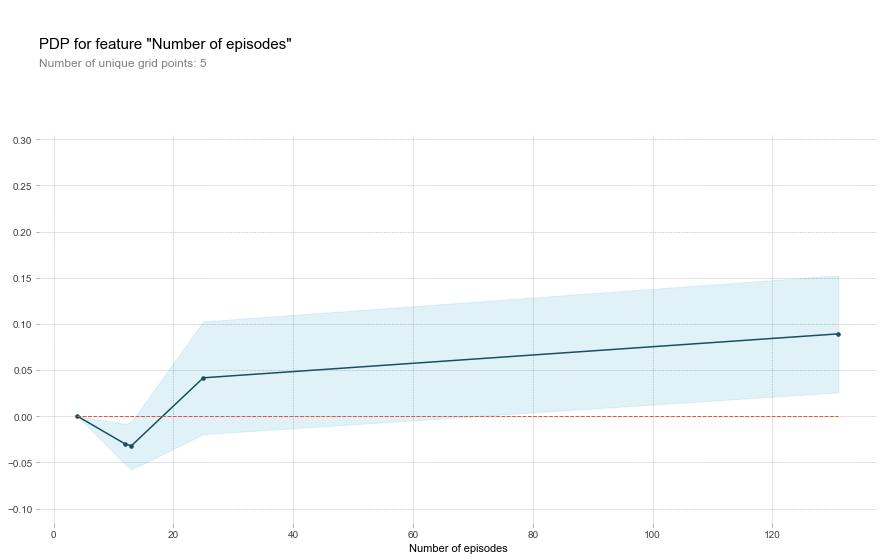

In [240]:
# Create the data that we will plot
pdp_graph = pdp.pdp_isolate(model=model, dataset=val_X, model_features=val_X.columns.tolist(), feature='Episodes')

pdp.pdp_plot(pdp_graph, 'Number of episodes')
plt.show()

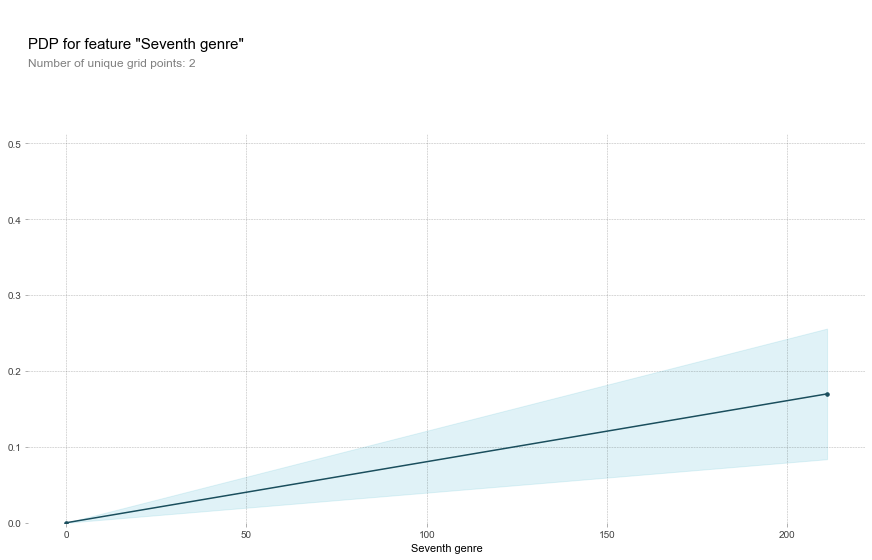

OrderedDict([('Comedy', 395), ('Drama', 280), ('Action', 273), ('Shounen', 211), ('Romance', 208), ('Slice of Life', 199), ('Fantasy', 177), ('Adventure', 172), ('School', 168), ('Supernatural', 158), ('Sci-Fi', 147), ('Mystery', 101), ('Shoujo', 94), ('Seinen', 92), ('Magic', 86), ('Historical', 80), ('Sports', 62), ('Super Power', 56), ('Military', 56), ('Psychological', 53), ('Mecha', 52), ('Demons', 45), ('Space', 37), ('Music', 33), ('Parody', 33), ('Horror', 22), ('Game', 22), ('Thriller', 22), ('Martial Arts', 20), ('Josei', 20), ('Samurai', 20), ('Vampire', 14), ('Harem', 12), ('Kids', 12), ('Police', 11), ('Shounen Ai', 10), ('Shoujo Ai', 9), ('Cars', 7), ('Dementia', 4)])


In [241]:
# Create the data that we will plot
pdp_graph = pdp.pdp_isolate(model=model, dataset=val_X, model_features=val_X.columns.tolist(), feature='Genres6')

pdp.pdp_plot(pdp_graph, 'Seventh genre')
plt.show()

print(genres)

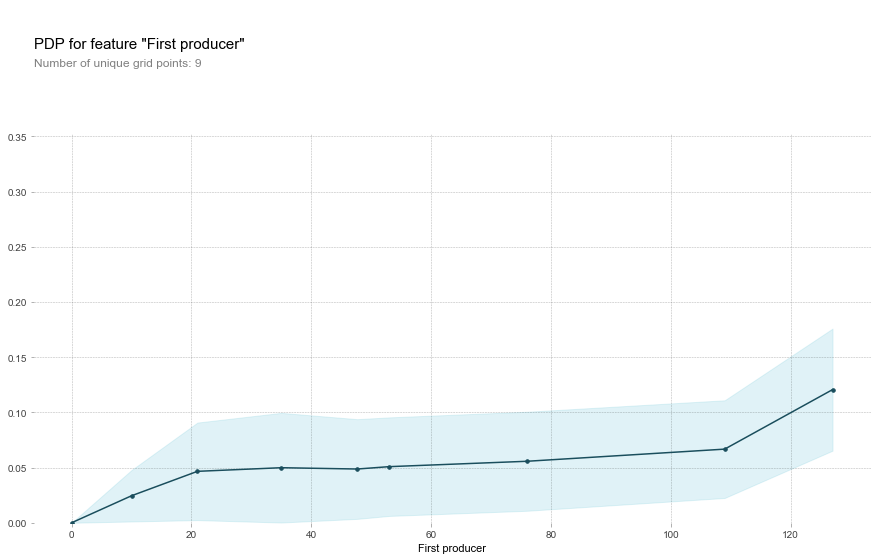

[('Aniplex', 127), ('TV Tokyo', 109), ('Dentsu', 86), ('Lantis', 76), ('Movic', 74), ('Fuji TV', 70), ('Mainichi Broadcasting System', 66), ('Shueisha', 58), ('Kodansha', 54), ('Sotsu', 53), ('Pony Canyon', 52), ('Bandai Visual', 51), ('KlockWorx', 46), ('AT-X', 46), ('DAX Production', 41), ('TBS', 40), ('Starchild Records', 37), ('Kadokawa Shoten', 36), ('NHK', 35), ('Nihon Ad Systems', 32)]


In [257]:
# Create the data that we will plot
pdp_graph = pdp.pdp_isolate(model=model, dataset=val_X, model_features=val_X.columns.tolist(), feature='Producers0')

pdp.pdp_plot(pdp_graph, 'First producer')
plt.show()

print(list(producers.items())[:20])

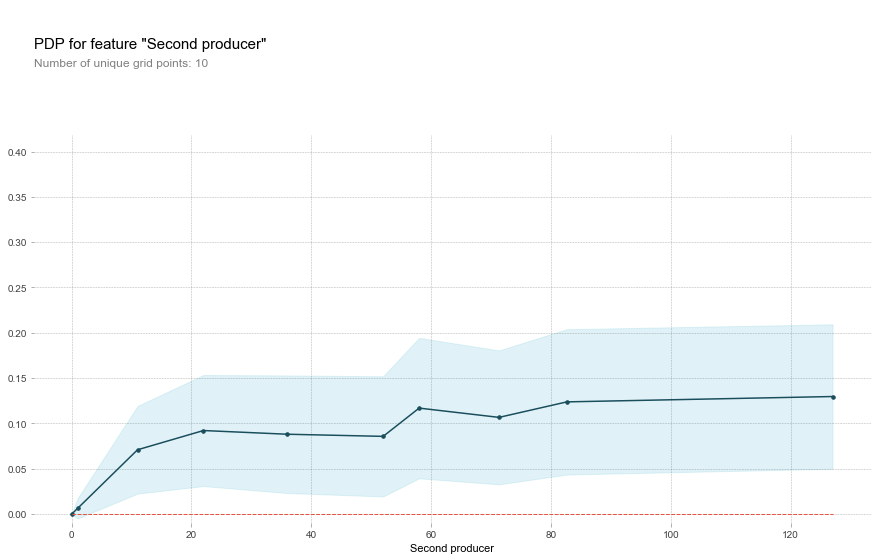

[('Aniplex', 127), ('TV Tokyo', 109), ('Dentsu', 86), ('Lantis', 76), ('Movic', 74), ('Fuji TV', 70), ('Mainichi Broadcasting System', 66), ('Shueisha', 58), ('Kodansha', 54), ('Sotsu', 53), ('Pony Canyon', 52), ('Bandai Visual', 51), ('KlockWorx', 46), ('AT-X', 46), ('DAX Production', 41), ('TBS', 40), ('Starchild Records', 37), ('Kadokawa Shoten', 36), ('NHK', 35), ('Nihon Ad Systems', 32)]


In [254]:
# Create the data that we will plot
pdp_graph = pdp.pdp_isolate(model=model, dataset=val_X, model_features=val_X.columns.tolist(), feature='Producers1')

pdp.pdp_plot(pdp_graph, 'Second producer')
plt.show()

print(list(producers.items())[:20])

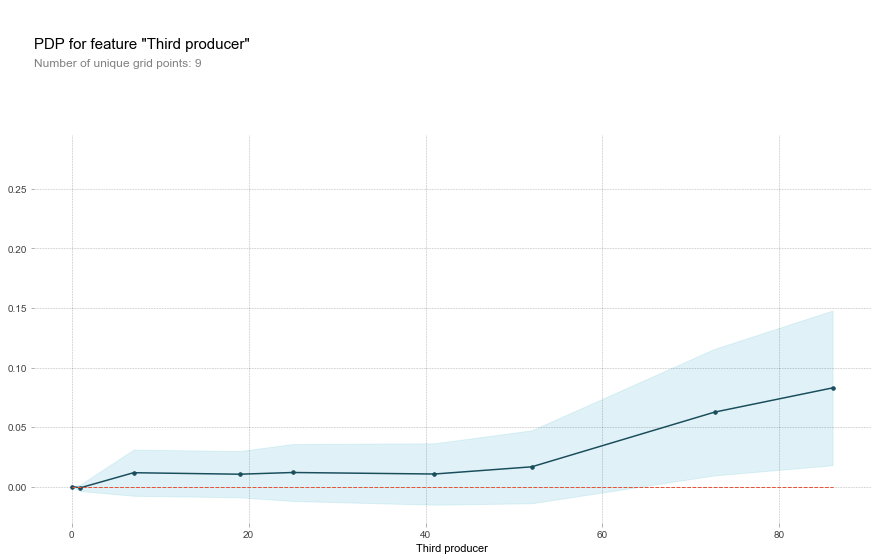

[('Aniplex', 127), ('TV Tokyo', 109), ('Dentsu', 86), ('Lantis', 76), ('Movic', 74), ('Fuji TV', 70), ('Mainichi Broadcasting System', 66), ('Shueisha', 58), ('Kodansha', 54), ('Sotsu', 53), ('Pony Canyon', 52), ('Bandai Visual', 51), ('KlockWorx', 46), ('AT-X', 46), ('DAX Production', 41), ('TBS', 40), ('Starchild Records', 37), ('Kadokawa Shoten', 36), ('NHK', 35), ('Nihon Ad Systems', 32)]


In [255]:
# Create the data that we will plot
pdp_graph = pdp.pdp_isolate(model=model, dataset=val_X, model_features=val_X.columns.tolist(), feature='Producers2')

pdp.pdp_plot(pdp_graph, 'Third producer')
plt.show()

print(list(producers.items())[:20])

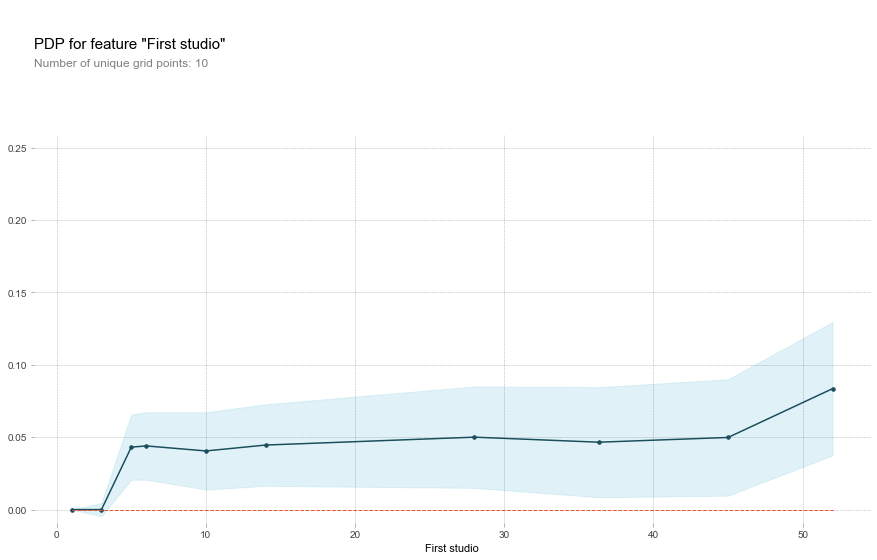

[('Sunrise', 52), ('Madhouse', 50), ('Toei Animation', 47), ('Studio Deen', 45), ('J.C.Staff', 43), ('A-1 Pictures', 37), ('Studio Pierrot', 36), ('Production I.G', 35), ('Bones', 28), ('TMS Entertainment', 22), ('Nippon Animation', 22), ('Shaft', 22), ('Kyoto Animation', 21), ("Brain's Base", 16), ('Satelight', 14), ('Gonzo', 14), ('Tatsunoko Production', 12), ('MAPPA', 12), ('Doga Kobo', 10), ('Lerche', 10)]


In [256]:
# Create the data that we will plot
pdp_graph = pdp.pdp_isolate(model=model, dataset=val_X, model_features=val_X.columns.tolist(), feature='Studios0')

pdp.pdp_plot(pdp_graph, 'First studio')
plt.show()

print(list(studios.items())[:20])

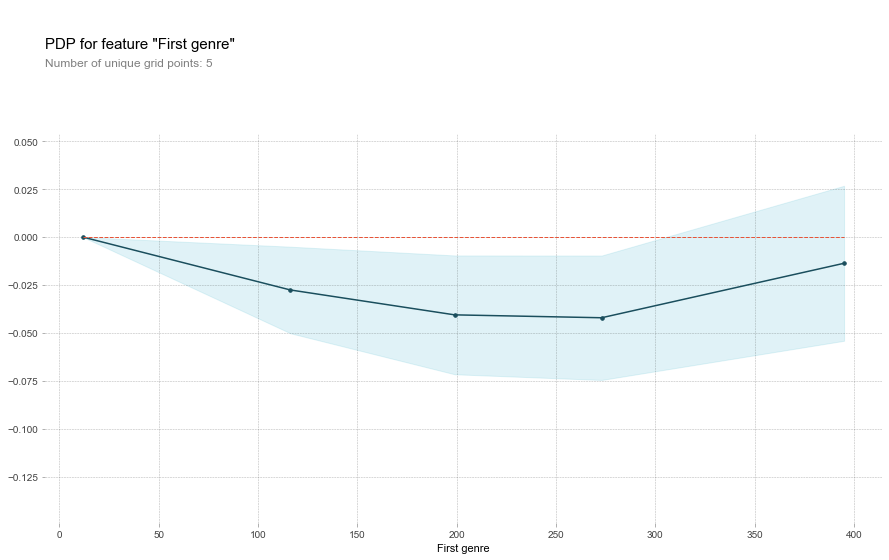

[('Comedy', 395), ('Drama', 280), ('Action', 273), ('Shounen', 211), ('Romance', 208), ('Slice of Life', 199), ('Fantasy', 177), ('Adventure', 172), ('School', 168), ('Supernatural', 158), ('Sci-Fi', 147), ('Mystery', 101), ('Shoujo', 94), ('Seinen', 92), ('Magic', 86), ('Historical', 80), ('Sports', 62), ('Super Power', 56), ('Military', 56), ('Psychological', 53)]


In [260]:
# Create the data that we will plot
pdp_graph = pdp.pdp_isolate(model=model, dataset=val_X, model_features=val_X.columns.tolist(), feature='Genres0')

pdp.pdp_plot(pdp_graph, 'First genre')
plt.show()

print(list(genres.items())[:20])

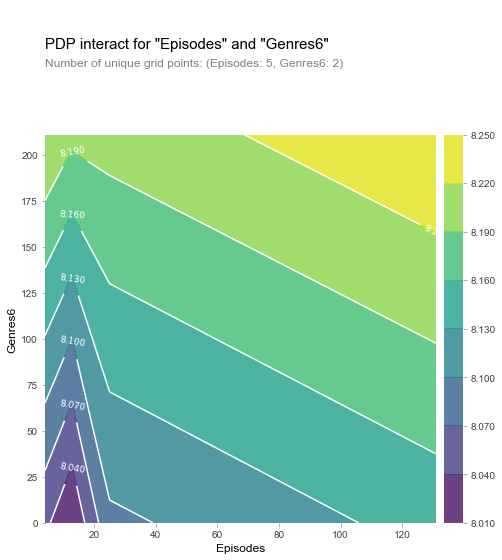

[('Comedy', 395), ('Drama', 280), ('Action', 273), ('Shounen', 211), ('Romance', 208), ('Slice of Life', 199), ('Fantasy', 177), ('Adventure', 172), ('School', 168), ('Supernatural', 158), ('Sci-Fi', 147), ('Mystery', 101), ('Shoujo', 94), ('Seinen', 92), ('Magic', 86), ('Historical', 80), ('Sports', 62), ('Super Power', 56), ('Military', 56), ('Psychological', 53)]


In [263]:
from pdpbox import pdp, get_dataset, info_plots

features_to_plot = ['Episodes', 'Genres6']
inter1  =  pdp.pdp_interact(model=model, dataset=val_X, model_features=val_X.columns.tolist(), features=features_to_plot)

pdp.pdp_interact_plot(pdp_interact_out=inter1, feature_names=features_to_plot, plot_type='contour')
plt.show()

print(list(genres.items())[:20])